# Experiment and path specification

In [1]:
# Specify the experiment for analysis
# experiment='cxic00318'
# runNumber = 123
# experiment='cxix40218'
experiment='cxilu9218'
runNumber=73 # includes cspad info


# Set the installation and output path
import os
os.environ['INSTALLPATH']= '/cds/home/m/mrware/TRXS-dev/TRXS-Run18v3'
os.environ['OUTPUTPATH']= '/cds/data/psdm/%s/%s/scratch' % (experiment[0:3],experiment)

# Import Libraries

In [2]:
# Magic iPython command to enable plotting
%matplotlib inline

# Load in the pythonBatchMagic library
from scipy.ndimage import gaussian_filter1d
import sys
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/pythonBatchMagic')
from pythonBatchMagic import *

# Determine current user
currentUser, error = unixCMD("echo $USER")
currentUser = currentUser.strip()
print(currentUser)
os.environ['RESULTSPATH']= ('/cds/data/psdm/%s/%s/results/%s' % (experiment[0:3],experiment,currentUser)).strip()
if not os.path.exists(os.environ['RESULTSPATH']):
    os.mkdir(os.environ['RESULTSPATH'])

Current user is mrware will output batch to /cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch
mrware


# Leveraging the batch queue to quickly grab point data

## Loading libraries

In [3]:
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/LCLS')
from LCLSdefault import *

sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/mattsLibraries')
from picklez import *

# Load in the get data library
from dataAnalysis import *

# Load in the batch library for lcls
from lclsBatch import *

/cds/data/psdm/cxi/cxilu9218/scratch/Memories/getCSPADcoords remembered!
Current user is mrware will output batch to /cds/data/psdm/cxi/cxilu9218/scratch/mrware/Batch


## Load point data

In [634]:
runNumber = 91
detArrays = load_obj(os.environ['RESULTSPATH']+'/pointData-run-%d' % runNumber)

/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-91 remembered!


In [209]:
detArrays.keys

<function keys>

In [4]:
# runNumbers = [50, 20, 21, 51, 52, 53, 54]
# runNumbers = [50,51, 52, 53, 54, 55]#, 56]#, 57, 58]
runNumbers = [43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62]#, 56]#, 57, 58]
# runNumbers = [54,55,56]#57,58,59,60]#, 56]#, 57, 58]
# runNumbers = [50]
# runNumbers = [91,92,93]#,94,98,99,100]
# runNumbers = [94,98,99]
# runNumbers = [108, 109,110,112,113,115]
# runNumbers = [73,74,75]
# runNumbers = [118, 119, 120, 121,122,126]
# runNumbers = np.arange(91,123)
# runNumbers = [149, 150]
# runNumbers = [153, 154]
# runNumbers = [20, 21]
# runNumbers = [164,165,166,167,168]
# runNumbers = [176,177,178, 179, 180]
# runNumbers = [184, 185, 186, 187, 188, 189]
# runNumbers = [195,196,204, 205]
# runNumbers = [204]
# runNumbers = [233,234]
def combineRuns(runNumbers, path=os.environ['RESULTSPATH']):
    detArrays = {}
    for idx,run in enumerate(runNumbers):
        if idx == 0:
            detArrays = load_obj(path+'/pointData-run-%d' % run)
        else:
            try:
                detArrays0 = load_obj(path+'/pointData-run-%d' % run)
                for key in detArrays.keys():
                    try:
                        detArrays[key] = np.append( detArrays[key], detArrays0[key], axis=0 )
                    except KeyError as ke:
                        print('Dropping key %s since it is not in %d' % (key,run))
                        detArrays.pop(key, None)
            except IOError as ioe:
                print(str(ioe))
                continue
    return detArrays

# detArrays = combineRuns(runNumbers, path='/cds/data/psdm/cxi/cxilu9218/results/khegazy/')
detArrays = combineRuns(runNumbers)

/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-43 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-44 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-45 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-46 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-47 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-48 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-49 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-50 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-51 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-52 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-53 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-54 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointData-run-55 remembered!
/cds/data/psdm/cxi/cxilu9218/results/mrware/pointDa

In [5]:
np.savez('CS2-1T-FullUV',**detArrays)

In [6]:
# detArrays=np.load('CS2-1T-FullUV.npz')

In [7]:
# detArrays.files

['xpos',
 'uvint1',
 'rois',
 'seconds',
 'nanoseconds',
 'xint',
 'fiducials',
 'ypos',
 'ttfltpos',
 'xrayOn',
 'stageencoder',
 'vitpos',
 'photonHist',
 'ttfltposampl',
 'ebeamcharge',
 'uvint',
 'xrayEnergy',
 'laserOn',
 'ttfltposfwhm',
 'gasPressure']

761076


(0, 2000)

/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


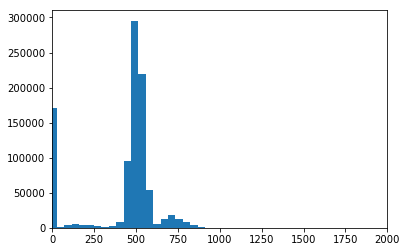

In [5]:
plt.hist(detArrays['ttfltpos'],2000);
print(np.sum(detArrays['ttfltpos']>0))
plt.xlim([0,2000])

(0, 300)

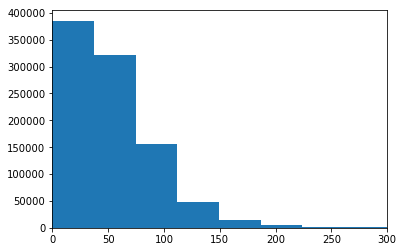

In [8]:
plt.hist(detArrays['ttfltposfwhm'],3000);
plt.xlim([0,300])

(0, 0.02)

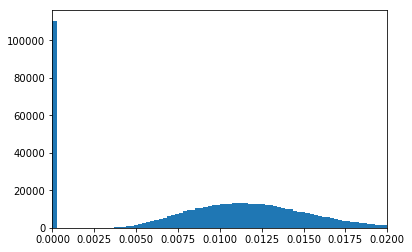

In [798]:
plt.hist(detArrays['ttfltposampl'],500);
plt.xlim([0,0.02])

In [467]:
detArrays['stageencoder'].shape

(133200,)

In [468]:
detArrays['rois'].shape

(133200, 200)

In [469]:
detArrays['laserOn'].shape

(133200,)

In [949]:
detArrays['xrayOn'].shape

(118000,)

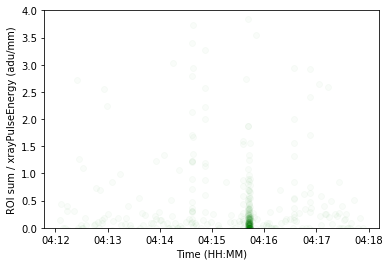

In [167]:
import datetime
import matplotlib.dates as dates
def getLabtime(second, microseconds):
    refdate = datetime.datetime(1970,1,1)
    td = datetime.timedelta(seconds=second,microseconds=microseconds)
    return refdate+td
labtime = np.array([getLabtime( s, float(ns)/1000. ) for s,ns in zip(detArrays['seconds'],detArrays['nanoseconds'])])

fig,ax= plt.subplots()
date_form = dates.DateFormatter('%H:%M', tz=None)

roiSum = np.sum(detArrays['rois'],-1)
xEng = detArrays['xrayEnergy']
goodIdx = (~np.isnan(roiSum))&(~np.isnan(xEng.astype(float)))
ratio = roiSum[goodIdx] / xEng[goodIdx]
ax.plot(labtime[goodIdx], ratio,'go',alpha=0.025)
ax.set_ylim([0,4])
ax.xaxis.set_major_formatter(date_form)
plt.xlabel('Time (HH:MM)')
plt.ylabel('ROI sum / xrayPulseEnergy (adu/mm)');


/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide
/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


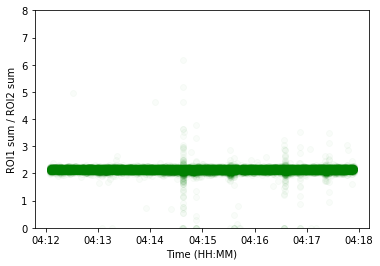

In [168]:
fig,ax= plt.subplots()
date_form = dates.DateFormatter('%H:%M', tz=None)

roiSum1 = np.sum(detArrays['rois'][:,1:4],-1)
roiSum2 = np.sum(detArrays['rois'][:,4:7],-1)

goodIdx = (~np.isnan(roiSum1))&(~np.isnan(roiSum2.astype(float)))
ratio = roiSum1[goodIdx] / roiSum2[goodIdx]
ax.plot(labtime[goodIdx], ratio,'go',alpha=0.025)
ax.set_ylim([0,8])
ax.xaxis.set_major_formatter(date_form)
plt.xlabel('Time (HH:MM)')
plt.ylabel('ROI1 sum / ROI2 sum');

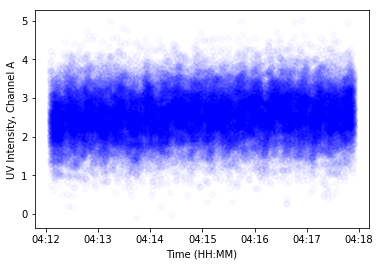

In [169]:
fig,ax= plt.subplots()
date_form = dates.DateFormatter('%H:%M', tz=None)
ax.plot(labtime, detArrays['uvint'],'bo',alpha=0.025)
ax.xaxis.set_major_formatter(date_form)
plt.xlabel('Time (HH:MM)')
plt.ylabel('UV Intensity, Channel A');

Text(0.5,0,'Time (HH:MM)')

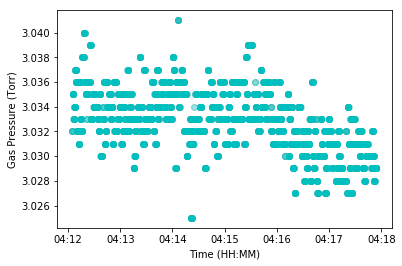

In [170]:
fig,ax= plt.subplots()
date_form = dates.DateFormatter('%H:%M', tz=None)
ax.plot(labtime, detArrays['gasPressure']-0.68,'co',alpha=0.025)
ax.xaxis.set_major_formatter(date_form)
plt.ylabel('Gas Pressure (Torr)');
plt.xlabel('Time (HH:MM)')

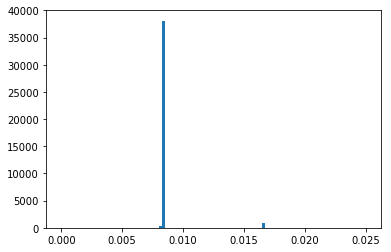

In [201]:
# dts = np.diff(labtime)
labtime_seconds = np.sort([(lt-datetime.datetime(1970,1,1)).total_seconds() for lt in labtime])
w=plt.hist(np.diff(labtime_seconds),bins=100,range=(0,.025));

In [500]:
weights = w[0]
edges = w[1][:-1]
print( edges[weights>5000] )

[0.00825]


## Plot histogram of result

In [9]:
detArrays['xrayEnergy']

array([-0.00502228,  0.64398074,  0.95376844, ...,  0.66589493,
        0.62678101,  0.72794801])

/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


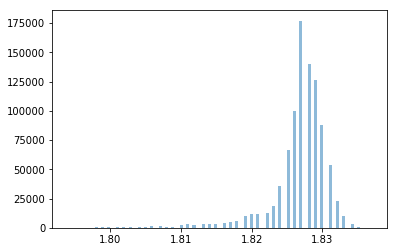

In [6]:


fig2, ax2 = plt.subplots(1, 1)
ax2.hist(detArrays['gasPressure'], bins=100,normed=False, alpha=0.5);
# print(detArrays['xrayEnergy'].shape)
# plt.savefig('runfolder/hist-xrayenergy')

(932400, 200)
0.8921422732593414
2459.3077713427715
2.9023777348777346
2472.198626126126


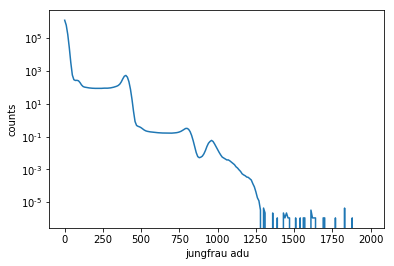

In [7]:
adu = np.arange(200) * 10
photonHistMean = np.nanmean(detArrays['photonHist'],0) 

plt.semilogy( adu,photonHistMean)
plt.xlabel('jungfrau adu')
plt.ylabel('counts')
print(detArrays['photonHist'].shape)

print( np.nanmean(detArrays['xrayEnergy'].astype(float)) )
print( np.sum( photonHistMean[ (adu>350)&(adu<450) ] ) )
print( np.sum( photonHistMean[ (adu>2*350)&(adu<2*450) ] ) )
print( np.sum( photonHistMean[adu>350] ) )

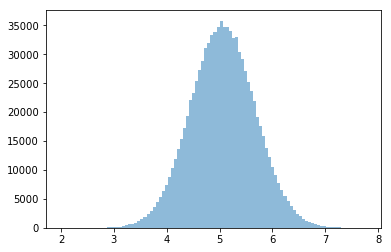

In [9]:


fig2, ax2 = plt.subplots(1, 1)
ax2.hist(detArrays['uvint'][~np.isnan(detArrays['uvint'])], bins=100,normed=False, alpha=0.5);
# print(detArrays['xrayEnergy'].shape)
# plt.savefig('runfolder/hist-xrayenergy')

/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


Text(0,0.5,'mean adu')

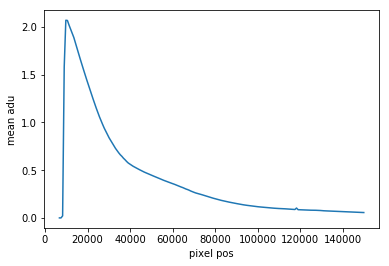

In [10]:
x = np.linspace(0,1.5e5, 200)
plt.plot(x,np.nanmean(detArrays['rois'][1:],0))
plt.xlabel('pixel pos')
plt.ylabel('mean adu')


# Look at ROIs vs. stage position

In [11]:
detArrays['xrayOn']

array([0., 0., 1., ..., 1., 1., 1.])

In [12]:
np.sum( detArrays['laserOn'].astype(bool))

767921

# Andy copy from here downwards!

/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


670442
932400
('allidx', 932400)
('goodidx', 670442)
('offidx', 160733)


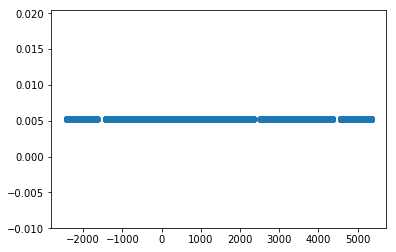

In [13]:
goodIdx = ( detArrays['xrayEnergy']>.3 ) & (np.nansum(detArrays['rois'],-1) > 20) & (~np.isnan(detArrays['uvint']))
offIdx = goodIdx &(~detArrays['laserOn'].astype(bool))
goodIdx = goodIdx & ( detArrays['laserOn'].astype(bool)) 
# goodIdx = goodIdx &( (detArrays['ttfltpos']>490)  & (detArrays['ttfltpos']<510)  )

# dp=200
dp=130
# dp=100
goodIdx = goodIdx &( (detArrays['ttfltpos']>500-dp)  & (detArrays['ttfltpos']<500+dp)  )
goodIdx = goodIdx &( (detArrays['ttfltposfwhm']>5) )
goodIdx = goodIdx &( (detArrays['ttfltposampl']>.005)   )

# goodIdx = detArrays['laserOn'].astype(bool) & ( detArrays['rois'][:,10] > 0 ).astype(bool) & (detArrays['xrayEnergy']>.1)
# offIdx = (~detArrays['laserOn'].astype(bool)) & ( detArrays['rois'][:,10] > 0 ).astype(bool) & (detArrays['xrayEnergy']>.1)



pos = detArrays['stageencoder'][goodIdx] 
ttpos = detArrays['ttfltpos'][goodIdx]
goodRois = detArrays['rois'][goodIdx,:]
offRois =  detArrays['rois'][offIdx,:]
# goodRois = (detArrays['rois'][goodIdx,:].T/detArrays['xdiode'][goodIdx].T).T
# offRois =  (detArrays['rois'][offIdx,:].T/detArrays['xdiode'][offIdx].T).T
print(np.sum(goodIdx>0))
print(detArrays['ttfltpos'].size)

ttpoly = [2.95684259e-06, -1.43969413e-03]
def ttcorr(ttpos,ttpoly):
    return ttpoly[0]*ttpos+ttpoly[1]
truepos = -2*(pos-56.35) / (3e-4)  - ttcorr(ttpos,ttpoly)*1.0e6
posfs = -2*(pos-56.35) / (3e-4) 

# print(goodRois.shape)
roi1 = np.nansum(goodRois, -1)
roio = np.nansum(offRois,-1)
plotMe = ((goodRois.T)/(roi1.T)).T
# print(plotMe.shape,pos.shape)
plt.scatter(truepos,  np.nanmean(plotMe[:,:],-1) );

# roi3 = np.nanmean(plotMe[truepos>1,:],0  )
# roi2 = np.nanmean(plotMe[truepos<-1,:],0)
# print(roi3.shape)
# for el in (roi3-roi2):
#     print('%.7f'%el)

print('allidx',detArrays['ttfltpos'].size)
print('goodidx',np.sum(goodIdx))
print('offidx',np.sum(offIdx))

Text(0,0.5,'counts')

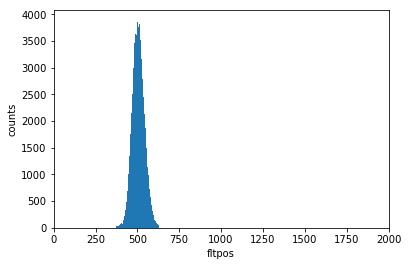

In [14]:
plt.hist(detArrays['ttfltpos'][goodIdx],500);
plt.xlim([0,2000])
plt.xlabel('fltpos')
plt.ylabel('counts')

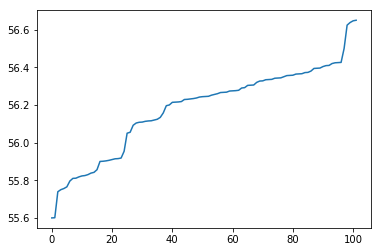

In [15]:
plt.plot(np.sort(np.unique( np.round(pos,decimals=3),axis=None)))

In [16]:
db = 1e-3
bins = np.unique(pos) - db
bins = np.append(bins, bins[-1]+ 2*db)
nb = bins.size
nr = goodRois.shape[1]

def createBinsFromCenters(centers):
    bins = []
    nc = centers.size
    for idx,c in enumerate(centers):
        if idx == 0:
            dc = np.abs( c - centers[idx])/2.
            bins.append(c-dc)
            bins.append(c+dc)
        elif idx == nc-1:
            dc = np.abs( c - centers[idx-1])/2.
            bins.append(c+dc)
        else:
            dc = np.abs( c - centers[idx+1])/2.
            bins.append(c+dc)
#         print(dc)
    return np.array(bins)

def determineGoodCenters( pos ):
    upos = np.unique(pos)
    gpos = []
    for idx,up in enumerate(upos):
        c = np.sum(upos == up)
        if c>10:
            gpos.append()
        
bins = createBinsFromCenters(  np.sort(np.unique( np.round(pos,decimals=3),axis=None)).flatten())
binspos = bins
# print(bins)
nb = bins.size
weightMe = ((goodRois.T)/(roi1.T)).T
# weightMe = (goodRois)
print(pos.size)
print(weightMe.shape)

radialHist = np.zeros((nb-1,nr))
radialAvg = np.zeros((nb-1,nr))

counts,edges = np.histogram( pos,bins=bins)
for ir in range(nr):

    radialHist[:,ir],edges = np.histogram( pos,bins=bins, weights=weightMe[:,ir])
    radialAvg[:,ir] = radialHist[:,ir] / counts
    
# print(counts)

670442
(670442, 200)


/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in divide


[ 5000.          4993.33333333  4073.33333333  4000.
  3960.          3900.          3693.33333333  3600.
  3593.33333333  3546.66666667  3513.33333333  3500.
  3466.66666667  3413.33333333  3386.66666667  3293.33333333
  3000.          2993.33333333  2980.          2960.
  2933.33333333  2906.66666667  2900.          2880.
  2640.          2000.          1966.66666667  1720.
  1640.          1613.33333333  1606.66666667  1580.
  1566.66666667  1560.          1533.33333333  1506.66666667
  1440.          1280.          1026.66666667  1000.
   906.66666667   900.           893.33333333   880.
   806.66666667   800.           786.66666667   773.33333333
   753.33333333   720.           706.66666667   700.
   693.33333333   653.33333333   626.66666667   600.
   560.           553.33333333   546.66666667   506.66666667
   500.           493.33333333   480.           400.
   386.66666667   306.66666667   300.           293.33333333
   200.           153.33333333   146.66666667   106.6666666

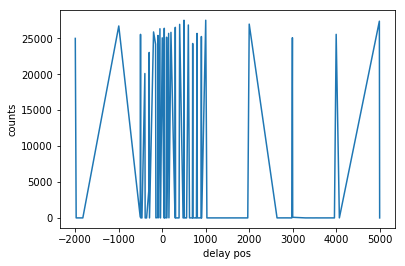

In [17]:
centers = np.sort(np.unique(np.round(pos,decimals=3),axis=None)).flatten()
centerspos = centers
plt.plot(-2*(centers-56.35) / (3e-4), counts)
# usecenters = centers[counts>400]
usecenters = [5000,4500,4000,3500,3000,2750,2500,2250,2000,1750,1500,1250,1000,900,800,700,600,500,400,300,150,100,50,
              0,-50,-100,-150,-200,-250,-300,-400,-500,-750,-1000,-1500,-2000]
plt.xlabel('delay pos')
plt.ylabel('counts')
print( -2*(centers-56.35) / (3e-4) )

In [18]:
radialAvg.shape

(102, 200)

In [19]:
L = 90.7*1000. # micron
TwoTheta = np.arctan(x/L)
lambdaX = 1.252
Q = 4*np.pi*np.sin(TwoTheta/2) / lambdaX
# plt.plot(x,Q)

Text(0.5,1,'I - I(goose) for runs[43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]')

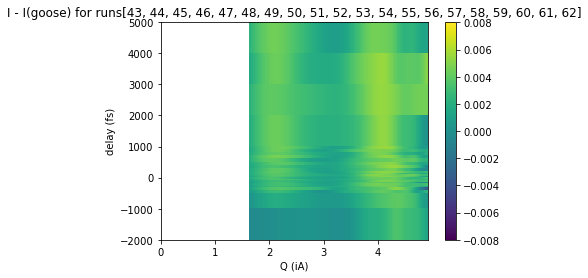

In [20]:
cutoff = 400

plot2d= (radialAvg)[counts>cutoff,:] #/avgAll

rcent = centers[counts>cutoff]
# subAll = np.mean( plot2d[:3,:][:,:], 0 )
# subAll = np.mean( plot2d[:,:], 0 )
subAll = np.mean(((offRois.T)/(roio.T)).T,0)
avgAll = np.mean(((offRois.T)/(roio.T)).T,0)
# plot2d = (plot2d-subAll) /avgAll

gf = lambda x: gaussian_filter1d(x,8,axis=-1)
plot2d = (gf(plot2d)-gf(subAll)) /gf(avgAll)
# plot2d = gaussian_filter1d(plot2d,2,axis=-1)


dv = .008
# dv = .003
# dv = .001
# qs = x/ 31578.94736842 * 3.5
plt.pcolormesh(Q, -2*(rcent-56.35) / (3e-4) , plot2d, vmin = -dv, vmax = dv )
plt.colorbar()

# plt.matshow( plot2d[counts>cutoff,:] )

plt.xlabel('Q (iA)')
plt.ylabel('delay (fs)')
plt.title('I - I(goose) for runs'+str(runNumbers))
# plt.title('I - I(goose) for runs'+str(runNumber))
# plt.ylim([57.5,56.2])
# print(x)

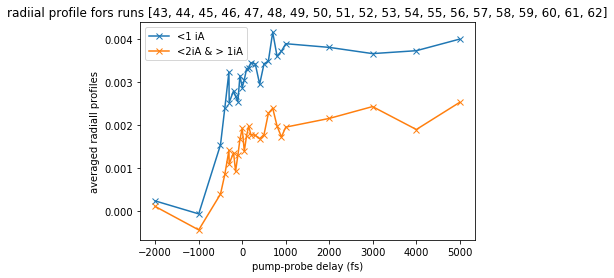

In [21]:
Qrange1 = (Q>1.7)&(Q<2.5)
Qrange2 = (Q>1.2)&(Q<1.7)
Qrange3 = (Q>2)&(Q<2.8)
Qrange4 = (Q>3)&(Q<4)
range1 = np.nanmean( plot2d[:,Qrange1],1 )
range2 = np.nanmean( plot2d[:,Qrange2],1 )
range3 = np.nanmean( plot2d[:,Qrange3],1 )
range4 = np.nanmean( plot2d[:,Qrange4],1 )
# plt.scatter(rcent,range1)
# plt.scatter(rcent,range2)
plt.plot( -2*(rcent-56.35) / (3e-4),range1,'-x',label='<1 iA')
plt.plot( -2*(rcent-56.35) / (3e-4),range2,'-x',label='<2iA & > 1iA')
# plt.ylim([-.0015,.001])
# plt.xlim([-1000,1000])
plt.ylabel('averaged radiall profiles')
plt.xlabel('pump-probe delay (fs)')
plt.title('radiial profile fors runs '+str(runNumbers))
plt.legend()

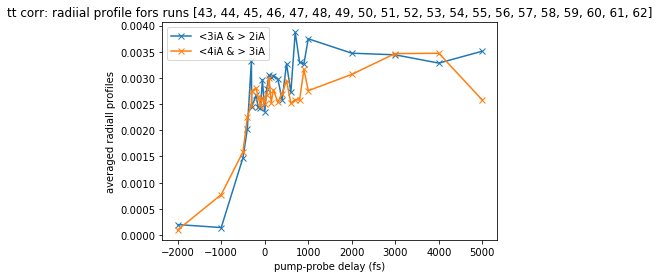

In [22]:

plt.plot(-2*(rcent-56.35) / (3e-4),range3,'-x',label='<3iA & > 2iA')
plt.plot(-2*(rcent-56.35) / (3e-4),range4,'-x',label='<4iA & > 3iA')
# plt.ylim([-.0003,.0003])
plt.ylabel('averaged radiall profiles')
plt.xlabel('pump-probe delay (fs)')
plt.title('tt corr: radiial profile fors runs '+str(runNumbers))
plt.legend()

# Repeat with timetool correction

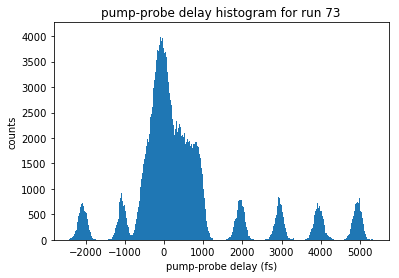

In [23]:
ttpoly = [2.95684259e-06, -1.43969413e-03]
def ttcorr(ttpos,ttpoly):
    return ttpoly[0]*ttpos+ttpoly[1]

# truepos = -2*(pos-56.35) / (3e-4)  + ttcorr(ttpos,ttpoly)*1.0e6 # correct
truepos = -2*(pos-56.35) / (3e-4)  - ttcorr(ttpos,ttpoly)*1.0e6 # wrong
posfs = -2*(pos-56.35) / (3e-4) 

plt.hist(truepos,bins=1000);
plt.xlabel('pump-probe delay (fs)')
plt.ylabel('counts')
# plt.xlim([-10000,10000])
# plt.xlim([-1000,1000])
plt.title('pump-probe delay histogram for run %d' % runNumber)

 
# usecenters = np.flip(np.sort(np.unique( np.round(posfs,decimals=3),axis=None)).flatten())

# usecenters = [5000,4000,3000,2000,1200,1100,1000,900,800,700,600,500,400,
#               300,200,100,0,
#               -100,-200,-300,-400,-500,-600,-700,-800,-900,-1000,-2000]


# usecenters = np.arange(10,-10,-1)*1000.

# usecenters = np.arange(50,-50,-10)*1000.
# usecenters = np.arange(3,-2,-.1)*1000.

# usecenters = [5000,4000,3000,2000,1200,1100,1000,900,800,700,600,500,450,400,
#               350,300,250,200,150,100,50,0,-50,
#               -100,-150,-200,-250,-300,-350,-400,-450,-500,-650,-800,-1000,-2000]

# usecenters = np.arange(5000,1000,-500)
# usecenters = np.append(usecenters, np.arange(1000,-1000,-50))
# usecenters = np.append(usecenters, np.arange(-1000,-2500,-500))

# usecenters = np.arange(5000,1000,-250)
# usecenters = np.append(usecenters, np.arange(1000,-900,-25))
# usecenters = np.append(usecenters, np.arange(-1000,-2500,-250))

usecenters = np.arange(5000,1000,-1000)
# usecenters = np.append(usecenters, np.arange(1000,-900,-25))
usecenters = np.append(usecenters, np.arange(1000,-900,-5))
usecenters = np.append(usecenters, np.arange(-1000,-2500,-1000))

# usecenters = np.arange(5000,1000,-1000)
# usecenters = np.append(usecenters, np.arange(1000,-900,-5))
# usecenters = np.append(usecenters, np.arange(-1000,-2500,-1000))

# usecenters = np.arange(5000,1000,-1000)
# usecenters = np.append(usecenters, np.arange(1000,-900,-5))
# usecenters = np.append(usecenters, np.arange(-1000,-2500,-1000))

# usecenters = [5000,4000,3000,2000,1200,1100,1000,900,800,700,600,500,450,400,
#               350,300,250,200,150,100,50,0,-50,
#               -100,-150,-200,-250,-300,-350,-400,-450,-500,-600,-700,-800, -900,-1000,-2000]

# usecenters = [5000,4000,3000,2000,1200,1100,1000,900,800,700,600,500,475,450,425,400,375,
#               350,325,300,275,250,225,200,175,150,125,100,75,50,25,0,-25,-50,-75,
#               -100,-125,-150,-175,-200,-225,-250,-275,-300,-325,-350,-375,-400,-425,-450,-475,-500,-600,-700,-800, -900,-1000,-2000]

# print(usecenters)


In [24]:
db = 1e-3
bins = np.unique(pos) - db
bins = np.append(bins, bins[-1]+ 2*db)
nb = bins.size
nr = goodRois.shape[1]

def createBinsFromCenters(centers):
    bins = []
    nc = centers.size
    for idx,c in enumerate(centers):
        if idx == 0:
            dc = np.abs( c - centers[idx+1])/2.
            bins.append(c-dc)
            bins.append(c+dc)
        elif idx == nc-1:
            dc = np.abs( c - centers[idx-1])/2.
            bins.append(c+dc)
        else:
            dc = np.abs( c - centers[idx+1])/2.
            bins.append(c+dc)
#         print(dc)
    return np.array(bins)

def determineGoodCenters( pos ):
    upos = np.unique(pos)
    gpos = []
    for idx,up in enumerate(upos):
        c = np.sum(upos == up)
        if c>10:
            gpos.append()
        
# bins = np.flip(-2*(createBinsFromCenters(  np.round(usecenters,decimals=2) )-56.35)/(3.0e-4))
# centersfs = np.flip(-2*(np.round(usecenters,decimals=2)-56.35)/(3.0e-4))

bins = createBinsFromCenters( np.flip(np.array(usecenters) ))
centersfs =np.flip(np.array(usecenters))

#### use rough times
# bins = np.flip(-2*(binspos-56.35)/(3.0e-4))
# centersfs = -2*(centerspos-56.35)/(3.0e-4)

# print(bins)
# -(pos-56.35) / (3e-4) 
nb=bins.size
weightMe = ((goodRois.T)/(roi1.T)).T
print(weightMe.shape, truepos.shape)

radialHist = np.zeros((nb-1,nr))
radialAvg = np.zeros((nb-1,nr))
counts,edges = np.histogram( truepos,bins=bins)
for ir in range(nr):

    radialHist[:,ir],edges = np.histogram( truepos,bins=bins, weights=weightMe[:,ir])
    radialAvg[:,ir] = radialHist[:,ir] / counts
    
# print(counts)

((670442, 200), (670442,))


379
379


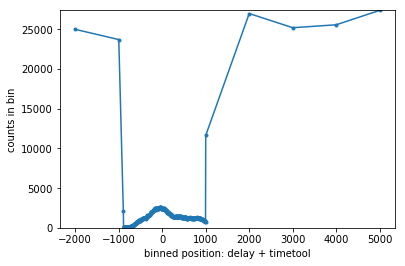

In [25]:
cutoff = 10
plt.plot(centersfs, counts,'.-')
# print(centersfs).-
plt.ylim([cutoff,np.max(counts)])
plt.xlabel('binned position: delay + timetool')
plt.ylabel('counts in bin')
print(np.sum( counts[(centersfs>-1000)&(centersfs<1000)]>10 ))
print(( counts[(centersfs>-1000)&(centersfs<1000)].size ))

Text(0.5,1,'ttcorr: (I - I(early))/I(early)  for runs[43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]')

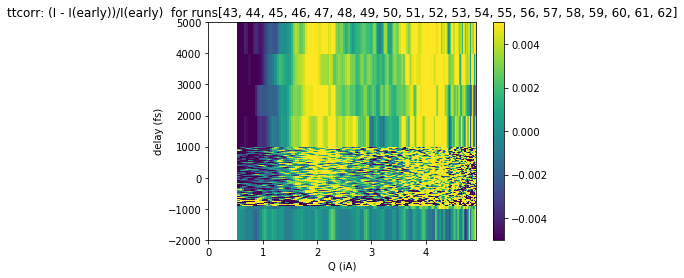

In [26]:


plot2d= (radialAvg)[counts>cutoff,:] #/avgAll
rcent=centersfs[counts>cutoff]
# subAll = np.mean( plot2d[:3,:], 0 )
# subAll = np.mean( plot2d[:,:], 0 )
avgAll = np.mean(((offRois.T)/(roio.T)).T,0)
subAll = np.mean(((offRois.T)/(roio.T)).T,0)
# plot2d = (plot2d-subAll) #/avgAll
# dv = .0001
# plot2d = (plot2d-subAll) /avgAll

gf = lambda x: gaussian_filter1d(x,1,axis=-1)
plot2d = (gf(plot2d)-gf(subAll)) /gf(avgAll)
# plot2d = gaussian_filter1d(plot2d,2,axis=-1)

dv = .005
# dv = .003
# dv = .01
# qs = x/ 31578.94736842 * 3.5
plt.pcolormesh(Q, rcent, plot2d, vmin = -dv, vmax = dv )
plt.colorbar()
plt.xlabel('Q (iA)')
plt.ylabel('delay (fs)')
plt.title('ttcorr: (I - I(early))/I(early)  for runs'+str(runNumbers))
# plt.title('I - I(goose)  for runs'+str(runNumber))
# plt.ylim([-500,1000])
# print(x)

# Look at lineouts

(-1000, 1000)

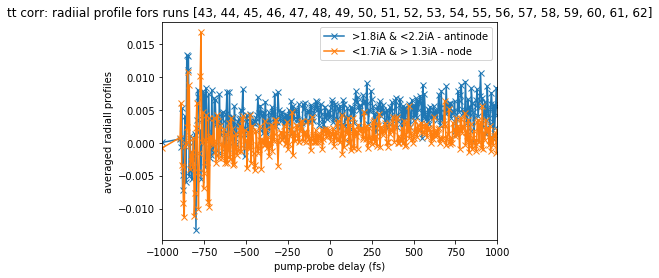

In [27]:
# rcent, plot2d
# print(plot2d.shape)

# Qrange1 = (Q>.6)&(Q<1.5)
# Qrange1 = (Q>.7)&(Q<1.2)
Qrange1 = (Q>1.8)&(Q<2.2)
# Qrange2 = (Q>1.5)&(Q<3.)
Qrange2 = (Q>1.3)&(Q<1.7)
Qrange3 = (Q>2)&(Q<2.8)
Qrange4 = (Q>3)&(Q<4)
# range1 = np.nanmedian( plot2d[:,Qrange1],1 )
# range2 = np.nanmedian( plot2d[:,Qrange2],1 )
# range3 = np.nanmedian( plot2d[:,Qrange3],1 )
# range4 = np.nanmedian( plot2d[:,Qrange4],1 )
range1 = np.nanmean( plot2d[:,Qrange1],1 )
range2 = np.nanmean( plot2d[:,Qrange2],1 )
range3 = np.nanmean( plot2d[:,Qrange3],1 )
range4 = np.nanmean( plot2d[:,Qrange4],1 )

# plt.scatter(rcent,range1)
# plt.scatter(rcent,range2)
plt.plot(rcent,range1,'-x',label='>1.8iA & <2.2iA - antinode')
plt.plot(rcent,range2,'-x',label='<1.7iA & > 1.3iA - node')
# plt.plot(rcent,(range3-range2)/(range2+range3) )
# plt.plot(rcent,range3,'-x',label='<3iA & > 2iA')
# plt.plot(rcent,range4,'-x',label='<4iA & > 3iA')
# plt.ylim([-.0002,.0002])
# plt.xlim([-1000,1000])
# plt.xlim([-1000,2000])
plt.xlim([-2000,5000])
# plt.xlim([-400,1000])
plt.ylabel('averaged radiall profiles')
plt.xlabel('pump-probe delay (fs)')
plt.title('tt corr: radiial profile fors runs '+str(runNumbers))
plt.legend()
plt.xlim([-1000,1000])
# plt.plot(rcent,range3)
# plt.plot(rcent,range4)


In [1]:
# ridx=(rcent>-1000)&(rcent<=1000)
ridx=(rcent>0)&(rcent<=1000)
fft1 = np.fft.fftshift(np.fft.fft( range1[ridx] - np.mean(range1[ridx]) ))
fft2 = np.fft.fftshift(np.fft.fft(range2[ridx] - np.mean(range2[ridx])))

for2dfft =plot2d[ridx,:]
for2dfft = for2dfft - np.mean(for2dfft,0)
fftall = np.fft.fftshift(np.fft.fft(for2dfft , axis=0 ),axes=(0,))

NameError: name 'rcent' is not defined

In [2]:
2*np.pi/(10./1000.)

NameError: name 'np' is not defined

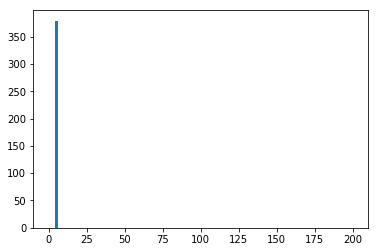

In [32]:
plt.hist(np.diff(rcent[ridx]),bins=100,range=(0,200));

Text(0.5,1,'thresholded, correct tt: FT(dI/I) for runs [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]')

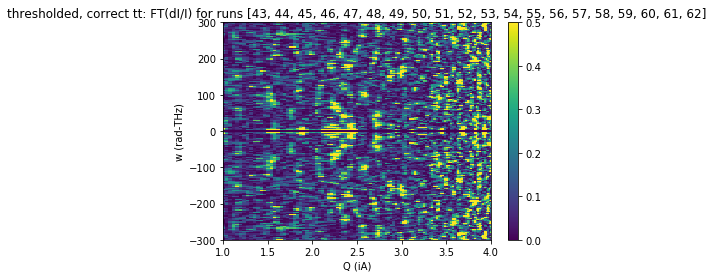

In [34]:
ws = np.fft.fftshift(np.fft.fftfreq(n=fft1.size,d=.005))*2*np.pi
dw = ws[2]-ws[1]
# plt.pcolormesh(Q,ws,np.abs(fftall/dw)**2,vmin=0,vmax=0.5e-4)

# plt.pcolormesh(Q,ws,np.abs(fftall/dw)**2,vmin=0e-3,vmax=.25e-4)
plt.pcolormesh(Q,ws,np.abs(fftall*dw)**2,vmin=0e-3,vmax=5e-1)


# plt.pcolormesh(Q,ws,np.abs(fftall/dw)**2,vmin=.1e-3,vmax=2.5e-3)
# plt.plot(Q,Q,'r')
# plt.plot([1,4.5],np.array([1,1])*2*np.pi/(50./1000.),'r')
# plt.pcolormesh(np.real(fftall),vmin=-.005,vmax=.005)
plt.colorbar()
# plt.ylim([-600,600])
plt.ylim([-300,300])
# plt.ylim([-100,100])
# plt.ylim([-160,160])
plt.xlim([1,4.])
plt.xlabel('Q (iA)')
plt.ylabel('w (rad-THz)')
plt.title('thresholded, correct tt: FT(dI/I) for runs '+str(runNumbers))

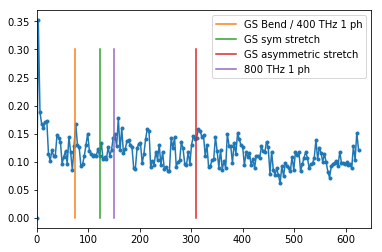

In [45]:
# plt.plot(ws, np.nanmean(np.abs(fftall[:,(Q<4.)&(Q>1.5)]*dw)**2,-1),'.-'  )
# plt.plot(ws, np.nanmean(np.abs(fftall[:,(Q<3)&(Q>2.5)]*dw)**2,-1),'.-'  )
plt.plot(ws, np.nanmean(np.abs(fftall[:,(Q<3)&(Q>1.)]*dw)**2,-1),'.-'  )
plt.xlim([0,650])

lineH = .3
wb=75
plt.plot([wb,wb],[0,lineH],label='GS Bend / 400 THz 1 ph')
# plt.plot([wb/2.,wb/2.],[0,.01])

wss=124
plt.plot([wss,wss],[0,lineH],label='GS sym stretch')
# plt.plot([wss/2.,wss/2.],[0,.01])

# was=289
was=310
plt.plot([was,was],[0,lineH],label='GS asymmetric stretch')
# plt.plot([was/2.,was/2.],[0,.01])

# wr1=75


wr2=150
plt.plot([wr2,wr2],[0,lineH],label='800 THz 1 ph')

plt.legend()

# print(np.mean(np.abs(fftall/dw)**2,-1))

/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice


(1, 4)

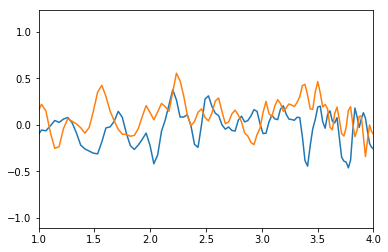

In [75]:
wb = 76
dwb = 10
plt.plot(Q, np.nanmean(np.real(fftall[(ws<wb+dwb)&(ws>wb-dwb),:]*dw),0))
plt.plot(Q, np.nanmean(np.imag(fftall[(ws<wb+dwb)&(ws>wb-dwb),:]*dw),0))
plt.xlim(1,4)

/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


(0, 0.3)

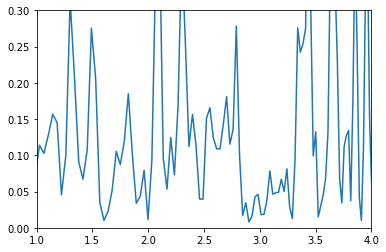

In [78]:
dwss = 4
plt.plot(Q, np.nanmean(np.abs(fftall[(ws<wss+dwss)&(ws>wss-dwss),:]*dw)**2,0))
plt.xlim(1,4)
plt.ylim([0,0.3])

/reg/g/psdm/sw/conda1/inst/miniconda2-prod-rhel7/envs/ana-2.0.11/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


(0, 0.16)

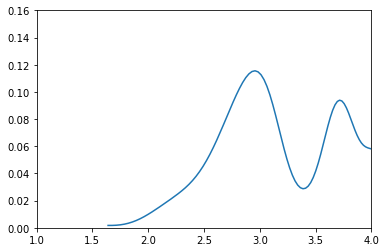

In [54]:
was = 310
dwas = 4
plt.plot(Q, np.nanmean(np.abs(fftall[(ws<was+dwas)&(ws>was-dwas),:]*dw)**2,0))
plt.xlim(1,4)
plt.ylim([0,0.16])

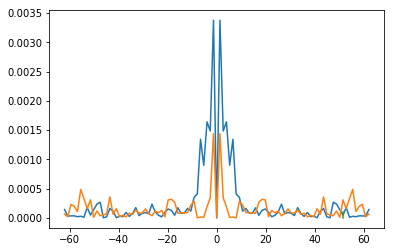

In [240]:
ws = np.fft.fftshift(np.fft.fftfreq(n=fft1.size,d=.05))*2*np.pi
# ws = 2*np.arange(fft1.size)*np.pi/(10./1000.)/fft1.size
ws = ws - np.mean(ws)
plt.plot(ws,np.abs(fft1)**2)
plt.plot(ws,np.abs(fft2)**2)
# plt.plot(ws,np.real(fft1))
# plt.plot(ws,np.real(fft2))
w = np.pi/(61./1000.)
plt.plot([w,w],[0,1e-4])
# plt.xlim([-100,100])
# plt.plot(ws,np.abs(fft2))

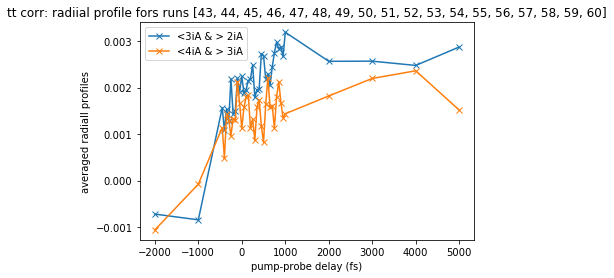

In [1387]:
plt.plot(rcent,range3,'-x',label='<3iA & > 2iA')
plt.plot(rcent,range4,'-x',label='<4iA & > 3iA')
# plt.ylim([-.0001,.0003])
# plt.xlim([-1000,1000])
plt.ylabel('averaged radiall profiles')
plt.xlabel('pump-probe delay (fs)')
plt.title('tt corr: radiial profile fors runs '+str(runNumbers))
plt.legend()
# plt.xlim([-500,500])
# plt.plot(rcent,range3)
# plt.plot(rcent,range4)


# Looking at qmap

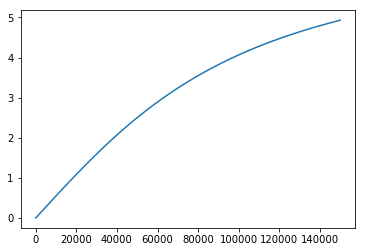

In [44]:
L = 90.7*1000. # micron
TwoTheta = np.arctan(x/L)
lambdaX = 1.252
Q = 4*np.pi*np.sin(TwoTheta/2) / lambdaX
plt.plot(x,Q)


In [632]:
x/L

array([0.        , 0.0870423 , 0.17408461, 0.26112691, 0.34816921,
       0.43521151, 0.52225382, 0.60929612, 0.69633842, 0.78338072,
       0.87042303, 0.95746533, 1.04450763, 1.13154993, 1.21859224,
       1.30563454, 1.39267684, 1.47971914, 1.56676145, 1.65380375])